In [57]:
import numpy as np
import pandas as pd

#import altair as alt 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# reading in csv

star = pd.read_csv('star_classification.csv')

In [59]:
star.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [60]:
# class is the only object so we predict that 
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [61]:
# also useful 
star.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [62]:
star[star['u'] == -9999] 

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [63]:
star['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [64]:
# converts classes to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
star['class'] = le.fit_transform(star['class'])

In [65]:
star['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [66]:
# Create a mapping back to original classes, may need later
class_mapping = {
    0: 'GALAXY',
    1: 'QSO',
    2: 'STAR'
}

In [67]:
# This code doesn't work because the data has more than 5000 rows, invalid for altair...

# line_plot = alt.Chart(star).mark_line().encode(
#     x='alpha:Q',
#     y='density:Q',
#     color='class:N'
# ).transform_density(
#     density='alpha',
#     groupby=['class'],
#     extent=[0, 5],
#     as_=['alpha', 'density']
# )

# line_plot

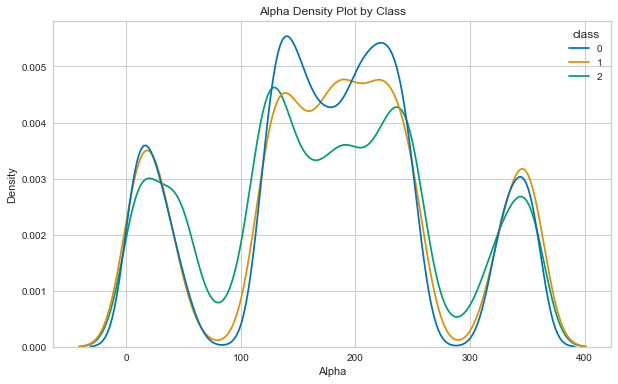

In [68]:
# seeing how different variables effect the classification // if the three look similar then it doens't help much
plt.figure(figsize=(10, 6))
sns.kdeplot(data=star, x='alpha', hue='class', common_norm=False, palette='colorblind')

plt.xlabel('Alpha')
plt.ylabel('Density')
plt.title('Alpha Density Plot by Class')
plt.show()

In [69]:
# Remember, could have also looked into correlations
# dropping irrelevant data here
star.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID', 'plate'], inplace=True)

In [70]:
star.drop(columns=['redshift'], inplace=True)

In [71]:
# class in one data frame and numbers in another

# x and y datasets
X = star.drop(columns=['class'])
y = star['class']

In [72]:
# scale data since all data is on different scales 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = ss.fit_transform(X)

In [73]:
from sklearn.model_selection import train_test_split

# split data into train/test
# going to use a standard 70/30 train/test split
# stratify=y because we have imbalanced classes - since we have a different number of galaxy, star, quasar, it keeps the original ratio while testing

x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=82, stratify=y) 

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    max_depth = 5,
    random_state=23, # in case of a "tie" on a split node
    class_weight="balanced" # A "balanced" class weight can help give more weight to smaller class sizes when imbalanced
)


# Fit the model and make predictions
dtc.fit(x_tr, y_tr)

y_pred = dtc.predict(x_te)

# Discussion #
*How does a decision tree actually work?*
The decision tree algorithm starts with the entire dataset then chooses a feature to split at the root node. The split feature at each node is chosen based on Gini purity (or entropy if chose in parameters). The split that results in the lowest impurity is the chosen feature for the first split, and the model goes from there. The model continues until one of three conditions are met: all nodes are pure, all nodes reach minimum sample size, or max depth is reached.
The first node is called the **root node**. The end nodes are called **leaf nodes**. all other nodes are called **internal nodes**. Each leaf node contains a final decision for that subset of data.

In [75]:
from sklearn.metrics import accuracy_score, classification_report

# calculate performance
accuracy = accuracy_score(y_te, y_pred)
classification_rep = classification_report(y_te, y_pred)

In [76]:
# print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     17834
           1       0.88      0.94      0.91      5688
           2       0.99      1.00      1.00      6478

    accuracy                           0.96     30000
   macro avg       0.95      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



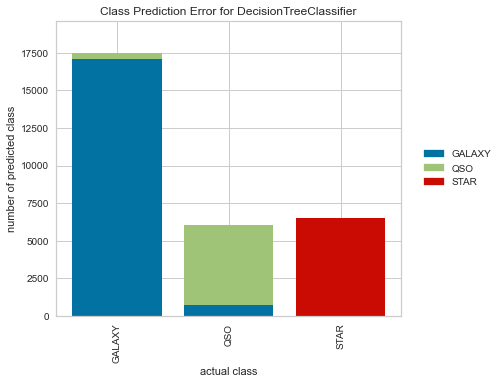

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [77]:
# pip install yellowbrick
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dtc, classes=['GALAXY','QSO', 'STAR'])

visualizer.fit(x_tr, y_tr)
visualizer.score(x_te, y_te)
visualizer.show()      

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    max_depth = 5,
    random_state=23, # in case of a "tie" on a split node
    class_weight="balanced" # A "balanced" class weight can help give more weight to smaller class sizes when imbalanced
)


# Fit the model and make predictions
rfc.fit(x_tr, y_tr)

y_pred_2 = rfc.predict(x_te)

In [79]:
# calculate performance
accuracy = accuracy_score(y_te, y_pred_2)
classification_rep = classification_report(y_te, y_pred_2)
accuracy

0.9552333333333334

In [80]:
feature_names = star.drop(columns=['class']).columns.tolist()

In [81]:
# Get feature importance scores
rfc_feature_importance = rfc.feature_importances_

important = pd.Series(rfc.feature_importances_, index=feature_names).sort_values(ascending=False).to_frame(name='importance')

important.reset_index(inplace=True)

important

# model is working off mainly z and u

,index,importance
0,redshift,0.679511
1,z,0.096902
2,g,0.065387
3,i,0.056843
4,u,0.043063
5,r,0.028774
6,MJD,0.028210
7,alpha,0.000734
8,delta,0.000577
